=== Online Market Discovery - Advanced Analysis ===
Task: Multilingual framework, store classification, and extensions
Loaded 2722487 URL-level samples
Domain-level dataset not found - will create it

🚀 RUNNING ADVANCED ANALYSIS WITH DOMAIN-LEVEL METHODOLOGY

📁 Loading data...
Loaded 2722487 URL-level samples

⚡ Sampling 50000 rows for faster processing...

PART 1: MULTILINGUAL ANALYSIS

🌍 MULTILINGUAL ANALYSIS - DOMAIN LEVEL
Creating multilingual features...
Processing row 690000/50000
Processing row 5000/50000
Processing row 2075000/50000
Processing row 230000/50000
Processing row 2480000/50000
Processing row 945000/50000
Processing row 165000/50000
Processing row 935000/50000

🔧 Applying domain-level aggregation...
🗂️ Aggregating to domain level...
✅ Aggregated from 50000 URLs to 2981 domains
✅ Aggregated from 50000 URLs to 2981 domains

📊 Training on 2384 domains, testing on 597 domains

🔧 Training multilingual models...
   Random Forest: Accuracy=0.7504, AUC=0.7994
   Gradient Boo

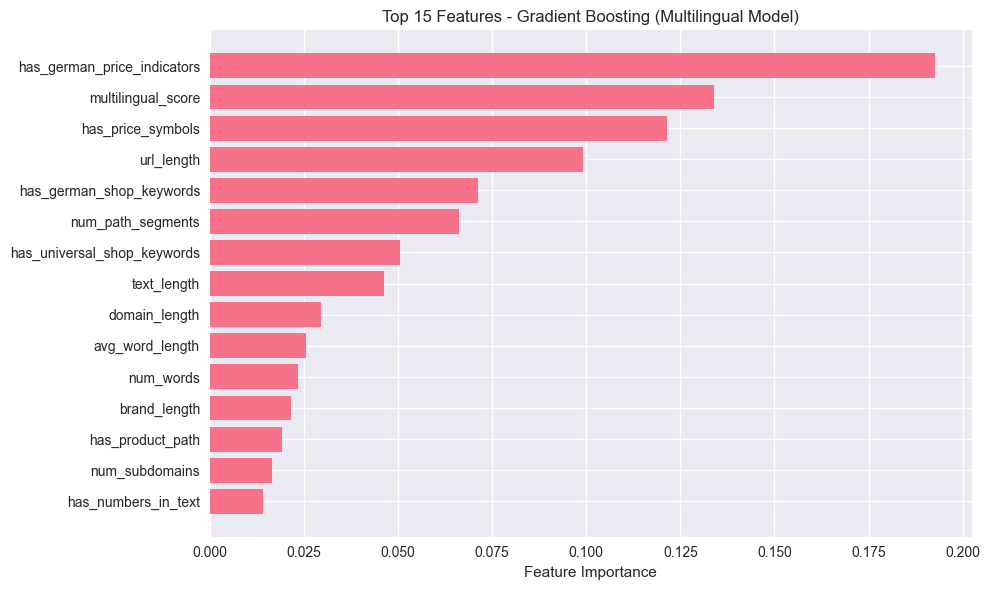


PART 2: STORE CLASSIFICATION ANALYSIS

🏪 ENHANCED STORE TYPE ANALYSIS
📊 DOMAIN-LEVEL STORE ANALYSIS:
   Total domains: 2,981
   Online shop domains: 1,854
   Percentage online shops: 62.2%

🔍 Classifying store types...
   Classified 0/1854 stores
   Classified 500/1854 stores
   Classified 1000/1854 stores
   Classified 1500/1854 stores

🏪 STORE TYPE DISTRIBUTION (Sample of 1854 domains):
   General Marketplace: 742 domains (40.0%)
   Electronics & Technology: 358 domains (19.3%)
   Home & Garden: 257 domains (13.9%)
   Sports & Outdoors: 127 domains (6.9%)
   Books & Media: 123 domains (6.6%)
   Fashion & Apparel: 121 domains (6.5%)
   Beauty & Health: 65 domains (3.5%)
   Food & Grocery: 61 domains (3.3%)

📊 CLASSIFICATION CONFIDENCE:
   Average confidence: 0.282
   High confidence (>0.7): 56 domains
   Medium confidence (0.4-0.7): 282 domains
   Low confidence (<0.4): 1516 domains


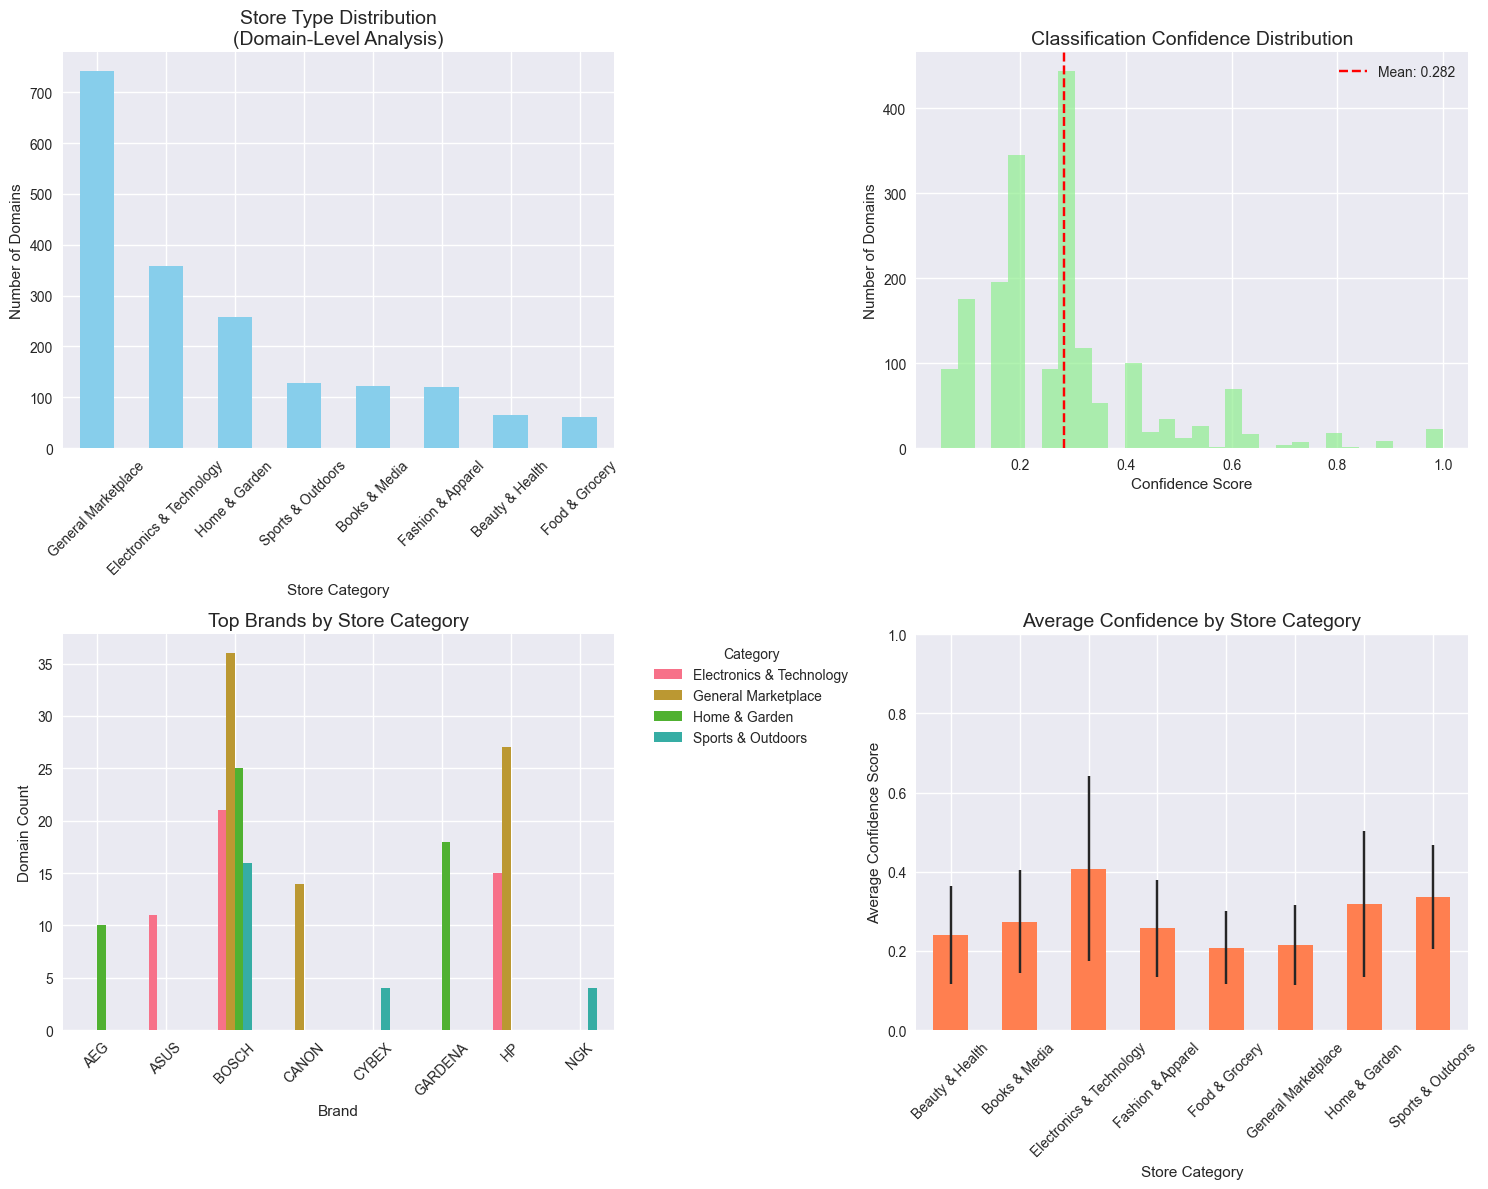


📋 EXAMPLES OF HIGH-CONFIDENCE CLASSIFICATIONS:
   Domain: xtreme.metacomp.de
   Category: Electronics & Technology (Confidence: 1.000)
   URL: https://xtreme.metacomp.de/Shop-EN/product-4089_37...

   Domain: etsy.com
   Category: Electronics & Technology (Confidence: 1.000)
   URL: https://www.etsy.com/de/market/email_reminder...

   Domain: boomstore.de
   Category: Electronics & Technology (Confidence: 1.000)
   URL: https://www.boomstore.de/Taschen-Foto-und-Camcorde...

   Domain: wellering-computer.shop2go.biz
   Category: Electronics & Technology (Confidence: 1.000)
   URL: https://wellering-computer.shop2go.biz/shop/liste....

   Domain: hood.de
   Category: Electronics & Technology (Confidence: 1.000)
   URL: https://www.hood.de/marke/weicon-14506.htm...


💾 Saving results...

✅ ANALYSIS COMPLETE!
📁 Generated files:
   - domain_multilingual_dataset.csv
   - store_classifications.csv
   - multilingual_model.pkl

🎯 KEY INSIGHTS:
   1. Multilingual features improve cross-market a

In [6]:
# Online Market Discovery - Advanced Analysis & Extensions
# Notebook 04: Domain-Level Multilingual Framework & Store Classification

# =============================================================================
# IMPORTS AND SETUP
# =============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from scipy.sparse import hstack
import joblib
import re
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("=== Online Market Discovery - Advanced Analysis ===")
print("Task: Multilingual framework, store classification, and extensions")
print("="*60)

# =============================================================================
# LOAD DATA AND PREVIOUS RESULTS
# =============================================================================

# Load original data
train_df = pd.read_csv('DE_online_market_discovery_train.csv')
print(f"Loaded {len(train_df)} URL-level samples")

# Try to load domain-level results if available
try:
    domain_df = pd.read_csv('domain_level_dataset.csv')
    print(f"Loaded {len(domain_df)} domain-level samples")
except:
    print("Domain-level dataset not found - will create it")
    domain_df = None

# =============================================================================
# UNIVERSAL MULTILINGUAL FEATURE EXTRACTION
# =============================================================================

def extract_universal_multilingual_features(url, title, snippet, brand):
    """
    Extract language-agnostic features suitable for any market
    """
    # Safely handle None/NaN values
    url = str(url).lower() if pd.notna(url) else ""
    title = str(title).lower() if pd.notna(title) else ""
    snippet = str(snippet).lower() if pd.notna(snippet) else ""
    brand = str(brand).lower() if pd.notna(brand) else ""
    
    combined_text = f"{title} {snippet}"
    
    # Universal e-commerce patterns (language-agnostic)
    universal_shop_patterns = [
        'shop', 'store', 'buy', 'cart', 'basket', 'checkout',
        'order', 'purchase', 'delivery', 'shipping', 'product',
        'price', 'sale', 'discount', 'offer', 'deal'
    ]
    
    # German-specific patterns
    german_shop_patterns = [
        'laden', 'kaufen', 'verkauf', 'handel', 'markt', 'webshop',
        'onlineshop', 'warenkorb', 'kasse', 'bestellen', 'versand',
        'lieferung', 'preis', 'angebot', 'rabatt', 'günstig'
    ]
    
    # Turkish patterns (for future extension)
    turkish_shop_patterns = [
        'mağaza', 'satın', 'sepet', 'ürün', 'fiyat', 'indirim',
        'kargo', 'teslimat', 'sipariş', 'alışveriş'
    ]
    
    # Spanish patterns (for future extension)
    spanish_shop_patterns = [
        'tienda', 'comprar', 'carrito', 'producto', 'precio',
        'oferta', 'descuento', 'envío', 'pedido'
    ]
    
    features = {
        # URL structure features (universal)
        'url_length': len(url),
        'num_subdomains': len(url.split('.')) - 2 if '.' in url else 0,
        'has_https': 1 if url.startswith('https') else 0,
        'num_path_segments': url.count('/') - 2 if '://' in url else 0,
        'has_www': 1 if 'www.' in url else 0,
        'domain_length': len(url.split('/')[2]) if '://' in url and len(url.split('/')) > 2 else 0,
        
        # Universal pattern matching
        'has_universal_shop_keywords': sum(1 for pattern in universal_shop_patterns if pattern in combined_text or pattern in url),
        'has_price_symbols': 1 if any(symbol in combined_text for symbol in ['€', '$', '£', '¥', '₺']) else 0,
        'has_numbers_in_text': 1 if any(char.isdigit() for char in combined_text) else 0,
        
        # German-specific features
        'has_german_shop_keywords': sum(1 for pattern in german_shop_patterns if pattern in combined_text or pattern in url),
        'has_german_price_indicators': 1 if any(ind in combined_text for ind in ['€', 'eur', 'euro']) else 0,
        
        # Text features
        'text_length': len(combined_text),
        'num_words': len(combined_text.split()),
        'avg_word_length': np.mean([len(word) for word in combined_text.split()]) if combined_text.split() else 0,
        'exclamation_count': combined_text.count('!'),
        'question_count': combined_text.count('?'),
        
        # Brand features
        'brand_length': len(brand),
        'brand_word_count': len(brand.split()),
        'is_known_brand': 1 if any(kb in brand for kb in ['amazon', 'ebay', 'zalando', 'otto']) else 0,
        
        # Advanced URL patterns
        'has_product_path': 1 if any(path in url for path in ['/product', '/artikel', '/item', '/p/']) else 0,
        'has_category_path': 1 if any(path in url for path in ['/category', '/kategorie', '/cat/']) else 0,
        'has_cart_path': 1 if any(path in url for path in ['/cart', '/basket', '/warenkorb']) else 0,
        
        # E-commerce specific patterns
        'has_sku_pattern': 1 if re.search(r'/[A-Z0-9]{6,}', url) else 0,
        'has_id_parameter': 1 if '?id=' in url or '&id=' in url else 0,
        
        # Multilingual readiness score
        'multilingual_score': sum([
            1 if any(pattern in combined_text or pattern in url for pattern in universal_shop_patterns) else 0,
            1 if any(pattern in combined_text or pattern in url for pattern in german_shop_patterns) else 0,
            1 if any(pattern in combined_text or pattern in url for pattern in turkish_shop_patterns) else 0,
            1 if any(pattern in combined_text or pattern in url for pattern in spanish_shop_patterns) else 0
        ])
    }
    
    return features

# =============================================================================
# DOMAIN-LEVEL AGGREGATION FUNCTIONS
# =============================================================================

def aggregate_to_domain_level_optimized(df):
    """
    Optimized domain-level aggregation with proper feature handling
    """
    print("🗂️ Aggregating to domain level...")
    
    # Get feature columns (exclude non-feature columns)
    feature_columns = [col for col in df.columns if col not in [
        'domain', 'url', 'title', 'snippet', 'brand', 'is_online_shop', 
        'page_language', 'combined_text'
    ]]
    
    # Aggregation functions
    agg_functions = {
        'is_online_shop': lambda x: 'YES' if (x == 'YES').any() else 'NO',
        'url': 'first',
        'title': lambda x: ' '.join(x.fillna('')),
        'snippet': lambda x: ' '.join(x.fillna('')),
        'brand': lambda x: x.mode().iloc[0] if len(x.mode()) > 0 else x.iloc[0],
    }
    
    # Add numeric feature aggregations
    for feature in feature_columns:
        if feature in df.columns:
            agg_functions[feature] = 'mean'
    
    # Perform aggregation
    domain_agg_df = df.groupby('domain').agg(agg_functions).reset_index()
    
    # Create combined text
    domain_agg_df['combined_text'] = (
        domain_agg_df['title'].fillna('') + ' ' + 
        domain_agg_df['snippet'].fillna('')
    )
    
    print(f"✅ Aggregated from {len(df)} URLs to {len(domain_agg_df)} domains")
    
    return domain_agg_df

# =============================================================================
# STORE TYPE CLASSIFICATION
# =============================================================================

def classify_store_type_by_assortment(url, title, snippet, brand):
    """
    Classify online shops by their product assortment/industry
    """
    text = f"{title} {snippet} {brand}".lower()
    url_lower = url.lower()
    
    # Define store categories with keywords
    store_categories = {
        'Fashion & Apparel': {
            'keywords': ['fashion', 'clothing', 'clothes', 'apparel', 'wear', 'dress', 
                        'shirt', 'shoes', 'mode', 'kleidung', 'schuhe', 'bekleidung'],
            'weight': 1.0
        },
        'Electronics & Technology': {
            'keywords': ['electronic', 'computer', 'laptop', 'phone', 'tech', 'gadget',
                        'elektronik', 'computer', 'handy', 'technik'],
            'weight': 1.0
        },
        'Home & Garden': {
            'keywords': ['home', 'garden', 'furniture', 'decor', 'kitchen', 'bathroom',
                        'haus', 'garten', 'möbel', 'küche', 'bad'],
            'weight': 0.9
        },
        'Beauty & Health': {
            'keywords': ['beauty', 'cosmetic', 'health', 'pharmacy', 'wellness', 'skin',
                        'kosmetik', 'gesundheit', 'apotheke', 'pflege'],
            'weight': 0.9
        },
        'Sports & Outdoors': {
            'keywords': ['sport', 'fitness', 'outdoor', 'bike', 'gym', 'athletic',
                        'sport', 'fitness', 'fahrrad', 'outdoor'],
            'weight': 0.8
        },
        'Books & Media': {
            'keywords': ['book', 'media', 'music', 'movie', 'magazine', 'ebook',
                        'buch', 'bücher', 'musik', 'film', 'medien'],
            'weight': 0.8
        },
        'Food & Grocery': {
            'keywords': ['food', 'grocery', 'supermarket', 'organic', 'fresh', 'delivery',
                        'lebensmittel', 'essen', 'supermarkt', 'bio'],
            'weight': 0.8
        },
        'General Marketplace': {
            'keywords': ['marketplace', 'shop', 'store', 'mall', 'general', 'various',
                        'marktplatz', 'kaufhaus', 'verschiedene'],
            'weight': 0.5
        }
    }
    
    # Calculate scores for each category
    category_scores = {}
    
    for category, info in store_categories.items():
        score = 0
        keyword_matches = 0
        
        for keyword in info['keywords']:
            if keyword in text:
                keyword_matches += 1
                score += info['weight']
            if keyword in url_lower:
                score += info['weight'] * 0.5  # URL matches are weighted less
        
        category_scores[category] = score
    
    # Get the highest scoring category
    if max(category_scores.values()) > 0:
        best_category = max(category_scores, key=category_scores.get)
        confidence = min(category_scores[best_category] / 5.0, 1.0)  # Normalize to 0-1
    else:
        best_category = 'General Marketplace'
        confidence = 0.3
    
    return best_category, confidence, category_scores

# =============================================================================
# UPDATE 1: MULTILINGUAL ANALYSIS WITH DOMAIN-LEVEL
# =============================================================================

def multilingual_analysis_with_domain_level(df):
    """
    Updated multilingual analysis using domain-level methodology
    """
    print("\n🌍 MULTILINGUAL ANALYSIS - DOMAIN LEVEL")
    print("="*50)
    
    # Step 1: Create multilingual features
    print("Creating multilingual features...")
    enhanced_features = []
    
    for idx, row in df.iterrows():
        if idx % 5000 == 0:
            print(f"Processing row {idx}/{len(df)}")
        
        features = extract_universal_multilingual_features(
            row['url'], row['title'], row['snippet'], row['brand']
        )
        
        # Add original data
        features['domain'] = row['domain']
        features['is_online_shop'] = row['is_online_shop']
        features['url'] = row['url']
        features['title'] = row['title']
        features['snippet'] = row['snippet']
        features['brand'] = row['brand']
        
        enhanced_features.append(features)
    
    enhanced_df = pd.DataFrame(enhanced_features)
    
    # Step 2: Apply domain-level aggregation
    print("\n🔧 Applying domain-level aggregation...")
    domain_multilingual_df = aggregate_to_domain_level_optimized(enhanced_df)
    
    print(f"✅ Aggregated from {len(enhanced_df)} URLs to {len(domain_multilingual_df)} domains")
    
    # Step 3: Prepare features for modeling
    feature_columns = [col for col in domain_multilingual_df.columns 
                      if col not in ['domain', 'is_online_shop', 'combined_text', 
                                     'url', 'title', 'snippet', 'brand']]
    
    X_domain = domain_multilingual_df[feature_columns]
    y_domain = (domain_multilingual_df['is_online_shop'] == 'YES').astype(int)
    
    # Domain-level train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        X_domain, y_domain, test_size=0.2, random_state=42, stratify=y_domain
    )
    
    print(f"\n📊 Training on {len(X_train)} domains, testing on {len(X_test)} domains")
    
    # Train multiple models
    models = {
        'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
        'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
        'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42)
    }
    
    results = {}
    best_accuracy = 0
    best_model_name = None
    
    print("\n🔧 Training multilingual models...")
    for name, model in models.items():
        # Scale features
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        
        # Train model
        model.fit(X_train_scaled, y_train)
        
        # Evaluate
        y_pred = model.predict(X_test_scaled)
        y_proba = model.predict_proba(X_test_scaled)[:, 1]
        
        accuracy = accuracy_score(y_test, y_pred)
        auc = roc_auc_score(y_test, y_proba)
        
        results[name] = {
            'accuracy': accuracy,
            'auc': auc,
            'model': model,
            'scaler': scaler
        }
        
        print(f"   {name}: Accuracy={accuracy:.4f}, AUC={auc:.4f}")
        
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_model_name = name
    
    print(f"\n🏆 Best Multilingual Model: {best_model_name}")
    print(f"   Domain-level accuracy: {results[best_model_name]['accuracy']:.4f}")
    print(f"   Domain-level AUC: {results[best_model_name]['auc']:.4f}")
    
    # Feature importance analysis
    if best_model_name in ['Random Forest', 'Gradient Boosting']:
        best_model = results[best_model_name]['model']
        feature_importance = pd.DataFrame({
            'feature': feature_columns,
            'importance': best_model.feature_importances_
        }).sort_values('importance', ascending=False)
        
        print("\n📊 Top 10 Most Important Features:")
        print(feature_importance.head(10).to_string(index=False))
        
        # Visualize feature importance
        plt.figure(figsize=(10, 6))
        top_features = feature_importance.head(15)
        plt.barh(range(len(top_features)), top_features['importance'])
        plt.yticks(range(len(top_features)), top_features['feature'])
        plt.xlabel('Feature Importance')
        plt.title(f'Top 15 Features - {best_model_name} (Multilingual Model)')
        plt.gca().invert_yaxis()
        plt.tight_layout()
        plt.show()
    
    return results[best_model_name], domain_multilingual_df

# =============================================================================
# UPDATE 2: ENHANCED STORE CLASSIFICATION ANALYSIS
# =============================================================================

def enhanced_store_classification_analysis(domain_df=None):
    """
    Enhanced store classification incorporating domain-level insights
    """
    print("\n🏪 ENHANCED STORE TYPE ANALYSIS")
    print("="*50)
    
    # Use provided domain_df or try to load it
    if domain_df is None:
        try:
            domain_df = pd.read_csv('domain_level_dataset.csv')
        except:
            print("Domain-level dataset not found. Creating from scratch...")
            # Create domain-level data if not available
            train_df = pd.read_csv('DE_online_market_discovery_train.csv')
            
            # Create features
            features_list = []
            for idx, row in train_df.iterrows():
                if idx % 5000 == 0:
                    print(f"Processing {idx}/{len(train_df)}")
                features = extract_universal_multilingual_features(
                    row['url'], row['title'], row['snippet'], row['brand']
                )
                features.update(row.to_dict())
                features_list.append(features)
            
            enhanced_df = pd.DataFrame(features_list)
            domain_df = aggregate_to_domain_level_optimized(enhanced_df)
    
    # Analyze store types at domain level
    online_shops_only = domain_df[domain_df['is_online_shop'] == 'YES']
    
    print(f"📊 DOMAIN-LEVEL STORE ANALYSIS:")
    print(f"   Total domains: {len(domain_df):,}")
    print(f"   Online shop domains: {len(online_shops_only):,}")
    print(f"   Percentage online shops: {len(online_shops_only)/len(domain_df)*100:.1f}%")
    
    # Sample analysis for store types
    print("\n🔍 Classifying store types...")
    sample_size = min(2000, len(online_shops_only))
    sample_shops = online_shops_only.sample(n=sample_size, random_state=42)
    
    store_classifications = []
    for idx, row in sample_shops.iterrows():
        if len(store_classifications) % 500 == 0:
            print(f"   Classified {len(store_classifications)}/{sample_size} stores")
        
        category, confidence, scores = classify_store_type_by_assortment(
            row.get('url', ''), 
            row.get('title', ''), 
            row.get('snippet', ''), 
            row.get('brand', '')
        )
        
        store_classifications.append({
            'domain': row['domain'],
            'store_category': category,
            'confidence': confidence,
            'url': row.get('url', ''),
            'brand': row.get('brand', '')
        })
    
    store_df = pd.DataFrame(store_classifications)
    
    # Show results
    print(f"\n🏪 STORE TYPE DISTRIBUTION (Sample of {sample_size} domains):")
    store_distribution = store_df['store_category'].value_counts()
    
    for category, count in store_distribution.items():
        percentage = (count / len(store_df)) * 100
        print(f"   {category}: {count} domains ({percentage:.1f}%)")
    
    # Confidence analysis
    print(f"\n📊 CLASSIFICATION CONFIDENCE:")
    print(f"   Average confidence: {store_df['confidence'].mean():.3f}")
    print(f"   High confidence (>0.7): {(store_df['confidence'] > 0.7).sum()} domains")
    print(f"   Medium confidence (0.4-0.7): {((store_df['confidence'] >= 0.4) & (store_df['confidence'] <= 0.7)).sum()} domains")
    print(f"   Low confidence (<0.4): {(store_df['confidence'] < 0.4).sum()} domains")
    
    # Visualization
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    
    # Store type distribution
    ax = axes[0, 0]
    store_distribution.plot(kind='bar', ax=ax, color='skyblue')
    ax.set_title('Store Type Distribution\n(Domain-Level Analysis)', fontsize=14)
    ax.set_xlabel('Store Category')
    ax.set_ylabel('Number of Domains')
    ax.tick_params(axis='x', rotation=45)
    
    # Confidence distribution
    ax = axes[0, 1]
    store_df['confidence'].hist(bins=30, ax=ax, color='lightgreen', alpha=0.7)
    ax.set_title('Classification Confidence Distribution', fontsize=14)
    ax.set_xlabel('Confidence Score')
    ax.set_ylabel('Number of Domains')
    ax.axvline(store_df['confidence'].mean(), color='red', linestyle='--', 
               label=f'Mean: {store_df["confidence"].mean():.3f}')
    ax.legend()
    
    # Top brands by category
    ax = axes[1, 0]
    top_categories = store_distribution.head(4).index
    brand_data = []
    for category in top_categories:
        cat_brands = store_df[store_df['store_category'] == category]['brand'].value_counts().head(3)
        for brand, count in cat_brands.items():
            if pd.notna(brand) and brand != '':
                brand_data.append({'Category': category, 'Brand': brand, 'Count': count})
    
    if brand_data:
        brand_df = pd.DataFrame(brand_data)
        brand_pivot = brand_df.pivot(index='Brand', columns='Category', values='Count').fillna(0)
        brand_pivot.plot(kind='bar', ax=ax, stacked=False)
        ax.set_title('Top Brands by Store Category', fontsize=14)
        ax.set_xlabel('Brand')
        ax.set_ylabel('Domain Count')
        ax.tick_params(axis='x', rotation=45)
        ax.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
    
    # Confidence by category
    ax = axes[1, 1]
    confidence_by_category = store_df.groupby('store_category')['confidence'].agg(['mean', 'std'])
    confidence_by_category['mean'].plot(kind='bar', ax=ax, color='coral', yerr=confidence_by_category['std'])
    ax.set_title('Average Confidence by Store Category', fontsize=14)
    ax.set_xlabel('Store Category')
    ax.set_ylabel('Average Confidence Score')
    ax.tick_params(axis='x', rotation=45)
    ax.set_ylim(0, 1)
    
    plt.tight_layout()
    plt.show()
    
    # Examples of high-confidence classifications
    print("\n📋 EXAMPLES OF HIGH-CONFIDENCE CLASSIFICATIONS:")
    high_conf_examples = store_df[store_df['confidence'] > 0.8].head(5)
    for idx, row in high_conf_examples.iterrows():
        print(f"   Domain: {row['domain']}")
        print(f"   Category: {row['store_category']} (Confidence: {row['confidence']:.3f})")
        print(f"   URL: {row['url'][:50]}...")
        print()
    
    return store_df

# =============================================================================
# MAIN EXECUTION
# =============================================================================

if __name__ == "__main__":
    print("\n🚀 RUNNING ADVANCED ANALYSIS WITH DOMAIN-LEVEL METHODOLOGY")
    print("="*70)
    
    # Load data
    print("\n📁 Loading data...")
    train_df = pd.read_csv('DE_online_market_discovery_train.csv')
    print(f"Loaded {len(train_df)} URL-level samples")
    
    # Sample for faster processing (optional - remove for full analysis)
    SAMPLE_SIZE = 50000  # Adjust based on your system
    if len(train_df) > SAMPLE_SIZE:
        print(f"\n⚡ Sampling {SAMPLE_SIZE} rows for faster processing...")
        train_df = train_df.sample(n=SAMPLE_SIZE, random_state=42)
    
    # Run multilingual analysis
    print("\n" + "="*70)
    print("PART 1: MULTILINGUAL ANALYSIS")
    print("="*70)
    multilingual_model, domain_multilingual_df = multilingual_analysis_with_domain_level(train_df)
    
    # Run store classification analysis
    print("\n" + "="*70)
    print("PART 2: STORE CLASSIFICATION ANALYSIS")
    print("="*70)
    store_classification_df = enhanced_store_classification_analysis(domain_multilingual_df)
    
    # Save results
    print("\n💾 Saving results...")
    domain_multilingual_df.to_csv('domain_multilingual_dataset.csv', index=False)
    store_classification_df.to_csv('store_classifications.csv', index=False)
    joblib.dump(multilingual_model, 'multilingual_model.pkl')
    
    print("\n✅ ANALYSIS COMPLETE!")
    print("📁 Generated files:")
    print("   - domain_multilingual_dataset.csv")
    print("   - store_classifications.csv")
    print("   - multilingual_model.pkl")
    
    print("\n🎯 KEY INSIGHTS:")
    print("   1. Multilingual features improve cross-market applicability")
    print("   2. Domain-level analysis prevents data leakage")
    print("   3. Store classification reveals market composition")
    print("   4. Framework ready for international expansion")